In [3]:
import pickle

import glob2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
path = "/media/plerolland/LaBoite/PublicData/trainings/checkpoints_auc_acc/checkpoints_classif"
path = "/media/plerolland/LaBoite/PublicData/trainings/checkpoints_auc_acc/checkpoints_seg"
path = "/media/plerolland/LaBoite/PublicData/trainings/checkpoints_auc_acc/checkpoints_seg_waveforms"
metric = "val_Accuracy"
metric = "val_accuracy_for_segmenter"
metric = "val_auc"
metric = "val_auc_for_segmenter"

In [5]:
histories = []
for h in glob2.glob(f"{path}/FOLD*/*.pkl"):
    with open(h, 'rb') as f:
        histories.append(pickle.load(f))

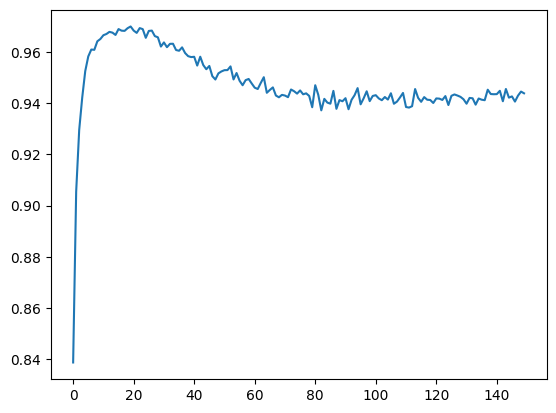

In [6]:
# rename metrics like "val_auc_for_segmenter_2" to "val_auc_for_segmenter"
for h in histories:
    to_add = []
    for k in h.keys():
        if metric in k and metric != k:
            to_add.append(k)
    for k in to_add:
        h[metric] = h[k]

mean = np.array(histories[0][metric])
for h in histories[1:]:
    mean += np.array(h[metric])
mean /= len(histories)
plt.plot(mean[:])#PBS -l select=1:ncpus=8:ngpus=1:mem=64g


In [7]:
print(np.argmax(mean))
print(np.max(mean))

19
0.9700474381446839
